In [9]:
import lhapdf
#import ROOT
import math
import pandas as pd
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.rcParams['text.usetex'] = True
## Getting a PDF member object
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq18 = lhapdf.mkPDF("CT18qed",0)
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_PDF = lhapdf.mkPDF("JAM20-SIDIS_PDF_proton_nlo", 0)
#JAM21_PDF = lhapdf.mkPDF("JAM21PionPDFnlo", 0)

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/CT18qed/CT18qed_0000.dat
CT18qed PDF set, member #0, version 1
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_PDF_proton_nlo/JAM20-SIDIS_PDF_proton_nlo_0000.dat
JAM20-SIDIS_PDF_proton_nlo PDF set, member #0, version 2


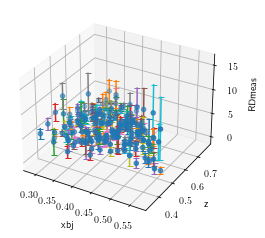

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
df = pd.read_csv("results/csv.csv")
xs = df[df['Q2']==4]['xbj_corr']
zs = df[df['Q2']==4]['z_corr']
RDs = df[df['Q2']==4]['y_RD']
RD_err = df[df['Q2']==4]['error_RD']
#ax.errorbar(xs,zs,RDs,RD_err,marker = "_")
for i in range(0,len(xs)):
    xbj_corr = xs[i]
    z_corr = zs[i]
    RD = RDs[i]
    RD_error = RD_err[i]
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")
plt.show()
#plt.savefig("RD_xbj_z")

In [11]:
df[df['Q2'] == 4.75].head()

,Q2,Q2_corr,xbj,xbj_corr,z,z_corr,RunGroup,y_RD,error_RD,y_RD_rho,...,yield_pos_rho,yield_neg_incnorad,yield_neg_incrad,yield_pos_incnorad,yield_pos_incrad,W2_corr,Wp2_corr,xprime_corr,zprime_corr,shms_p
213,4.75,4.70778,0.425,0.422497,0.325,0.344853,180,6.05671,3.300620,5.94910,...,0.015648,1.46676,1.38956,2.22222,2.16312,7.31875,4.98376,0.409098,0.333995,2.04760
214,4.75,4.16517,0.375,0.378695,0.375,0.374483,180,4.31549,0.569080,4.14818,...,0.364687,17.10630,15.33180,25.99210,23.72700,7.72030,5.05005,0.367623,0.362833,2.19608
215,4.75,4.56640,0.425,0.424416,0.375,0.377035,180,5.16479,0.676346,4.99286,...,0.404461,20.56100,18.57950,31.57090,28.95750,7.07844,4.62874,0.409972,0.363774,2.16204
216,4.75,4.94878,0.475,0.471110,0.375,0.379773,180,4.10271,0.658736,3.94650,...,0.259280,10.57290,9.31225,16.33790,14.47910,6.44161,4.20402,0.455207,0.366694,2.12570
217,4.75,5.32048,0.525,0.519438,0.375,0.384221,180,4.72852,1.398950,4.57694,...,0.080820,2.91330,2.43219,4.52297,3.65538,5.80751,3.76588,0.497687,0.367794,2.09713


In [12]:
#CSVS_results = []
pdf_sets = []
i_FF = 2
FF_model = ["fDSSLO","fDSSNLO","JAM20","hknsff07_LO","hknsff07_NLO"]
i_PDF = 1
PDF_model = ["cteq6l1","JAM20","cteq18qed"]
i_assumption = '7ass_'

In [13]:
#inits=(0,0)
#three input
#inits = (1,-1,1)
#inits = (0.31621375387783907,0.9655536623222454,2.2,1.4)
#inits = (0.31621375387783907,0.9655536623222454,4,0.2)
inits = (0.31621375387783907,0.9655536623222454,1.8,-0.2)
#inits = (0.31621375387783907,1.0602531294347466,0.60029420012617,0.5690151479308769)
#four input
#4
#inits=(0.5837438039662431,-1.1844700435399933,1.6742194710533476,0)
#4.75
#inits=(0.5487693365000776,-1.0881946339773718,1.594995464377801,0)
#5.5
#inits=(0.38322380904636766,-0.47844410509432217,1.115729075281362,0)
a_rho = -1.6
#rho_file = open("rho_sub_kai2.txt","a")
#rho_file.write("\n")
#rho_file.write(str(a_rho))
#rho_file.write(" ")
parameters=[]
param_errs=[]
Qs = []

In [14]:
#inits = (0.31621375387783907,0.9655536623222454,1.8,-0.2)
from iminuit import Minuit
import scipy.integrate as integrate
import scipy.special as sc
import sys
sys.path.insert(1,'DSS')
import fDSS_
sys.path.insert(1,'hkns07fflib-v1_2')
import hknsff07_
def Deltaz_param(z_had,params):
    delta_z = z_had**params[0]*(1-z_had)**params[1]
    return delta_z
def Dz_param(z_had,params):
    delta_z = z_had**params[0]*(1-z_had)**params[1]
    return (1-delta_z)/(1+delta_z)
    #return params[0]+params[1]*z_had+params[2]*z_had**2+params[3]*z_had**3
def CSVx_param(xbj,params):
    a = params[3]
    #a = -0.5
    b = params[2]
    c = sc.beta(a+2,b+1)/sc.beta(a+1,b+1)
    CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-c)
    #CSVx = params[3]*(1-xbj)**params[2]*xbj**(-0.5)*(xbj-c)
    #CSVx = (1-xbj)**4*xbj**params[3]*(xbj-params[2])
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]
    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[len(params)-1]
    return CSVx
    #return params[len(params)-1]
def Bxz_param(Q,z_had,xbj,i_pdf,i_ff):
    duplus = 0
    duminus = 0
    dsplus = 0
    dsminus = 0
    delta_z = 0
    if i_ff==0:
        duplus = fDSS_.fdss(1,1,0,z_hadron,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,0,z_hadron,Q*Q)[0]
        dsplus = fDSS_.fdss(1,1,0,z_hadron,Q*Q)[4]
        dsminus = fDSS_.fdss(1,-1,0,z_hadron,Q*Q)[4]
        delta_z = duminus/duplus 
    elif i_ff==1:
        duplus = fDSS_.fdss(1,1,1,z_hadron,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,1,z_hadron,Q*Q)[0]
        dsplus = fDSS_.fdss(1,1,1,z_hadron,Q*Q)[4]
        dsminus = fDSS_.fdss(1,-1,1,z_hadron,Q*Q)[4]
        delta_z = duminus/duplus
        #return (1-delta_z)/(1+delta_z)
    elif i_ff==2:
        duplus = JAM20.xfxQ(2,z_had,Q)
        duminus = JAM20.xfxQ(-2,z_had,Q)
        dsplus = JAM20.xfxQ(3,z_had,Q)
        dsminus = JAM20.xfxQ(-3,z_had,Q)
        delta_z = duminus/duplus
    elif i_ff==3:
        
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,1,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,1,2,ff_minus,grad_minus)
        duplus = ff[6]
        dsplus = ff[8]
        duminus = ff_minus[6]
        dsminus = ff_minus[8]
        delta_z = duminus/duplus
    elif i_ff==4:
        
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,2,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,2,2,ff_minus,grad_minus)
        duplus = ff[6]
        dsplus = ff[8]
        duminus = ff_minus[6]
        dsminus = ff_minus[8]
        delta_z = duminus/duplus
    ubar = 0
    dbar = 0
    uv = 0
    dv = 0
    strange = 0
    sbar = 0
    if i_pdf == 0:
        ubar = p_cteq6.xfxQ(-2,xbj,Q)
        dbar = p_cteq6.xfxQ(-1,xbj,Q)
        uv = p_cteq6.xfxQ(2,xbj,Q)-ubar
        dv = p_cteq6.xfxQ(1,xbj,Q)-dbar
        strange = p_cteq6.xfxQ(3,xbj,Q)
        sbar = p_cteq6.xfxQ(-3,xbj,Q)
    elif i_pdf == 1:
        ubar = JAM20_PDF.xfxQ(-2,xbj,Q)
        dbar = JAM20_PDF.xfxQ(-1,xbj,Q)
        uv = JAM20_PDF.xfxQ(2,xbj,Q)-ubar
        dv = JAM20_PDF.xfxQ(1,xbj,Q)-dbar
        strange = JAM20_PDF.xfxQ(3,xbj,Q)
        sbar = JAM20_PDF.xfxQ(-3,xbj,Q)
    elif i_pdf == 2:
        ubar = p_cteq18.xfxQ(-2,xbj,Q)
        dbar = p_cteq18.xfxQ(-1,xbj,Q)
        uv = p_cteq18.xfxQ(2,xbj,Q)-ubar
        dv = p_cteq18.xfxQ(1,xbj,Q)-dbar
        strange = p_cteq18.xfxQ(3,xbj,Q)
        sbar = p_cteq18.xfxQ(-3,xbj,Q)
    B_NS = 5*(ubar+dbar)/(uv+dv)
    B_sz = (dsplus+dsminus)/duplus/(1+delta_z) 
    B_S = B_sz*(strange+sbar)/(uv+dv)
    return 5/2+B_NS+B_S
def Ax_param(Q,xbj,i_pdf):
    uv = 0
    dv = 0
    if i_pdf == 0:
        uv = p_cteq6.xfxQ(2,xbj,Q)-p_cteq6.xfxQ(-2,xbj,Q)
        dv = p_cteq6.xfxQ(1,xbj,Q)-p_cteq6.xfxQ(-1,xbj,Q)
    elif i_pdf == 1:
        uv = JAM20_PDF.xfxQ(2,xbj,Q)-JAM20_PDF.xfxQ(-2,xbj,Q)
        dv = JAM20_PDF.xfxQ(1,xbj,Q)-JAM20_PDF.xfxQ(-1,xbj,Q)
    elif i_pdf ==2:
        uv = p_cteq18.xfxQ(2,xbj,Q)-p_cteq18.xfxQ(-2,xbj,Q)
        dv = p_cteq18.xfxQ(1,xbj,Q)-p_cteq18.xfxQ(-1,xbj,Q)
    return -4/(3*(uv+dv))
def RDmeas_rho(neg_D2_yield,pos_D2_yield,neg_rho_yield,a):
    neg_yield = neg_D2_yield+a*neg_rho_yield
    pos_yield = pos_D2_yield+a*neg_rho_yield
    RY = neg_yield/pos_yield
    RD = (4*RY-1)/(1-RY)
    return RD
def RDmeas_CSV(Q,z_had,xbj,params,i_pdf,i_ff):
    
    Dz = Dz_param(z_had,params)
    CSVx = CSVx_param(xbj,params)
    
    Bx = Bxz_param(Q,z_had,xbj,i_pdf,i_ff)
    Ax = Ax_param(Q,xbj,i_pdf)
    #RD_rho = RDmeas_rho(neg_D2_yield,pos_D2_yield,neg_rho_yield,gamma)
    return (Bx-Ax*CSVx)/Dz-2.5#+RD_rho



#print(str(m_1stQ2.fval))


No handles with labels found to put in legend.


0.3175923927474062 1.0069045546430502 4.418737989639909 -0.18362854909990703
402.1363266353438
['$\\chi^2$ / $n_\\mathrm{dof}$ = 402.1 / 209']


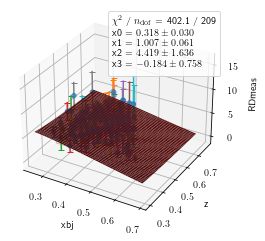

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_26982/3589432128.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfout = dfout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_26982/3589432128.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfout = dfout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_26982/3589432128.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfout = dfout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_26982/3589432128.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfout = dfout.append(row)
/var/folders/ll/8_2_l77j

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_26982/3589432128.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfout = dfout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_26982/3589432128.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfout = dfout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_26982/3589432128.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfout = dfout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_26982/3589432128.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfout = dfout.append(row)
/var/folders/ll/8_2_l77j

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_26982/3589432128.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfout = dfout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_26982/3589432128.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfout = dfout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_26982/3589432128.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfout = dfout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_26982/3589432128.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfout = dfout.append(row)
/var/folders/ll/8_2_l77j

In [15]:
Q2 = 4
Qs.append(Q2)
Q = math.sqrt(Q2)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
xs = []
zs = []
RDs = []

for i,row in df[df['Q2']==Q2].iterrows():
    xbj_corr = row['xbj_corr']
    xs.append(xbj_corr)
    #print(xbj_corr)
    z_corr = row['z_corr']
    zs.append(z_corr)
    RD = row['y_RD']
    RDs.append(RD)
    RD_error = row['error_RD']
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")
#plt.show()
def least_squares_1stQ2(params):
    least_square = 0
    for i,row in df[df['Q2']==Q2].iterrows():
        Q2corr = row['Q2_corr']
        xbj = row['xbj_corr']
        zhad = row['z_corr']
        RD = row['y_RD']
        RD_err = row['error_RD']
        neg_D2_yield = row['yield_neg']
        pos_D2_yield = row['yield_pos']
        neg_D2_rho = row['yield_neg_rho']
        Qcorr = math.sqrt(Q2corr)
        least_square+=((RD-RDmeas_CSV(Qcorr,zhad,xbj,params,i_PDF,i_FF)))**2/(RD_err)**2
    return least_square
m_1stQ2 = Minuit(least_squares_1stQ2,inits)
m_1stQ2.errordef = Minuit.LEAST_SQUARES
m_1stQ2.migrad()
m_1stQ2.hesse()
print(*m_1stQ2.values)
print(m_1stQ2.fval)
parameters.append(m_1stQ2.values)
param_errs.append(m_1stQ2.errors)

xbj_fit = np.arange(0.25,0.7,0.01)
zhad_fit = np.arange(0.3,0.75,0.01)

#x = np.array(xs)
#y = np.array(zs)
fit_RDmeas=[]
for xbj in xbj_fit:
    fit_RDmeas_zi = []
    for zi in zhad_fit:
        #fit_RDmeas_zi.append()
        fit_RDmeas.append(RDmeas_CSV(Q,zi,xbj,m_1stQ2.values,i_PDF,i_FF))
X,Y = np.meshgrid(xbj_fit,zhad_fit)
Z = np.reshape(fit_RDmeas,X.shape)
ax.plot_surface(X,Y,Z)
#ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)
#plt.plot(zs,fit_RDmeas,label = "fit")
#print(xs) 
#print(zs)
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_1stQ2.fval:.1f} / {len(zs) - m_1stQ2.nfit}",
]
print(fit_info)
for p, v, e in zip(m_1stQ2.parameters, m_1stQ2.values, m_1stQ2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))

     
plt.show()



#Residuals = []
#df[df['Q2']==Q2]["Residual"] = ""
dfout = pd.DataFrame()
for i,row in df[df['Q2']==Q2].iterrows():
    Q2corr = row['Q2_corr']
    xbj = row['xbj_corr']
    zhad = row['z_corr']
    RD = row['y_RD']
    RD_err = row['error_RD']
    Qcorr = math.sqrt(Q2corr)
    residual = (RD-RDmeas_CSV(Qcorr,zhad,xbj,m_1stQ2.values,i_PDF,i_FF))/RD_err
    #Residuals.append(residual)
    row['Residual']=(residual)
    dfout = dfout.append(row)
    #print(row)
    #row.to_csv('csv_out.csv',mode = 'a',header = False,encoding='utf-8')
    #with open('csv_out.csv','w') as csvoutput:
    #print(df_out)


RuntimeError: Unphysical x given: nan

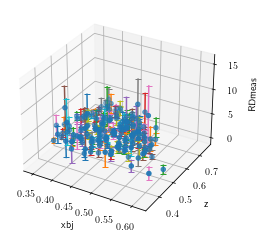

In [16]:
Q2 = 4.75
Qs.append(Q2)
Q = math.sqrt(Q2)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
xs = []
zs = []
RDs = []

for i,row in df[df['Q2']==Q2].iterrows():
    xbj_corr = row['xbj_corr']
    xs.append(xbj_corr)
    #print(xbj_corr)
    z_corr = row['z_corr']
    zs.append(z_corr)
    RD = row['y_RD']
    RDs.append(RD)
    RD_error = row['error_RD']
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")
#plt.show()
def least_squares_2ndQ2(params):
    least_square = 0
    for i,row in df[df['Q2']==Q2].iterrows():
        Q2corr = row['Q2_corr']
        xbj = row['xbj_corr']
        zhad = row['z_corr']
        RD = row['y_RD']
        RD_err = row['error_RD']
        neg_D2_yield = row['yield_neg']
        pos_D2_yield = row['yield_pos']
        neg_D2_rho = row['yield_neg_rho']
        Qcorr = math.sqrt(Q2corr)
        least_square+=((RD-RDmeas_CSV(Qcorr,zhad,xbj,params,i_PDF,i_FF)))**2/(RD_err)**2
    return least_square
m_2ndQ2 = Minuit(least_squares_2ndQ2,inits)
m_2ndQ2.errordef = Minuit.LEAST_SQUARES
m_2ndQ2.migrad()
m_2ndQ2.hesse()
print(*m_2ndQ2.values)
print(m_2ndQ2.fval)
parameters.append(m_2ndQ2.values)
param_errs.append(m_2ndQ2.errors)

xbj_fit = np.arange(0.25,0.7,0.01)
zhad_fit = np.arange(0.3,0.75,0.01)

#x = np.array(xs)
#y = np.array(zs)
fit_RDmeas=[]
for xbj in xbj_fit:
    fit_RDmeas_zi = []
    for zi in zhad_fit:
        #fit_RDmeas_zi.append()
        fit_RDmeas.append(RDmeas_CSV(Q,zi,xbj,m_2ndQ2.values,i_PDF,i_FF))
X,Y = np.meshgrid(xbj_fit,zhad_fit)
Z = np.reshape(fit_RDmeas,X.shape)
ax.plot_surface(X,Y,Z)
#ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)
#plt.plot(zs,fit_RDmeas,label = "fit")
#print(xs) 
#print(zs)
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_2ndQ2.fval:.1f} / {len(zs) - m_2ndQ2.nfit}",
]
print(fit_info)
for p, v, e in zip(m_2ndQ2.parameters, m_2ndQ2.values, m_2ndQ2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))

     
plt.show()

for i,row in df[df['Q2']==Q2].iterrows():
    Q2corr = row['Q2_corr']
    xbj = row['xbj_corr']
    zhad = row['z_corr']
    RD = row['y_RD']
    RD_err = row['error_RD']
    Qcorr = math.sqrt(Q2corr)
    residual = (RD-RDmeas_CSV(Qcorr,zhad,xbj,m_2ndQ2.values,i_PDF,i_FF))/RD_err
    #Residuals.append(residual)
    row['Residual']=(residual)
    dfout = dfout.append(row)

In [ ]:
Q2 = 5.5
Qs.append(Q2)
Q = math.sqrt(Q2)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
xs = []
zs = []
RDs = []

for i,row in df[df['Q2']==Q2].iterrows():
    xbj_corr = row['xbj_corr']
    xs.append(xbj_corr)
    #print(xbj_corr)
    z_corr = row['z_corr']
    zs.append(z_corr)
    RD = row['y_RD']
    RDs.append(RD)
    RD_error = row['error_RD']
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")
#plt.show()
def least_squares_3rdQ2(params):
    least_square = 0
    for i,row in df[df['Q2']==Q2].iterrows():
        Q2corr = row['Q2_corr']
        xbj = row['xbj_corr']
        zhad = row['z_corr']
        RD = row['y_RD']
        RD_err = row['error_RD']
        neg_D2_yield = row['yield_neg']
        pos_D2_yield = row['yield_pos']
        neg_D2_rho = row['yield_neg_rho']
        Qcorr = math.sqrt(Q2corr)
        least_square+=((RD-RDmeas_CSV(Qcorr,zhad,xbj,params,i_PDF,i_FF)))**2/(RD_err)**2
    return least_square
m_3rdQ2 = Minuit(least_squares_3rdQ2,inits)
m_3rdQ2.errordef = Minuit.LEAST_SQUARES
m_3rdQ2.migrad()
m_3rdQ2.hesse()
print(*m_3rdQ2.values)
print(m_3rdQ2.fval)
parameters.append(m_3rdQ2.values)
param_errs.append(m_3rdQ2.errors)

xbj_fit = np.arange(0.25,0.7,0.01)
zhad_fit = np.arange(0.3,0.75,0.01)

#x = np.array(xs)
#y = np.array(zs)
fit_RDmeas=[]
for xbj in xbj_fit:
    fit_RDmeas_zi = []
    for zi in zhad_fit:
        #fit_RDmeas_zi.append()
        fit_RDmeas.append(RDmeas_CSV(Q,zi,xbj,m_3rdQ2.values,i_PDF,i_FF))
X,Y = np.meshgrid(xbj_fit,zhad_fit)
Z = np.reshape(fit_RDmeas,X.shape)
ax.plot_surface(X,Y,Z)
#ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)
#plt.plot(zs,fit_RDmeas,label = "fit")
#print(xs) 
#print(zs)
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_3rdQ2.fval:.1f} / {len(zs) - m_3rdQ2.nfit}",
]
print(fit_info)
for p, v, e in zip(m_3rdQ2.parameters, m_3rdQ2.values, m_3rdQ2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))

     
plt.show()

for i,row in df[df['Q2']==Q2].iterrows():
        Q2corr = row['Q2_corr']
        xbj = row['xbj_corr']
        zhad = row['z_corr']
        RD = row['y_RD']
        RD_err = row['error_RD']
        Qcorr = math.sqrt(Q2corr)
        residual = (RD-RDmeas_CSV(Qcorr,zhad,xbj,m_3rdQ2.values,i_PDF,i_FF))/RD_err
        row['Residual']=(residual)
        dfout = dfout.append(row)
        
dfout.to_csv('results/csv_out.csv',index = False)

In [ ]:
from iminuit.util import propagate
print(m_1stQ2.covariance)
Deltaz_1st, Deltacov_1st = propagate(lambda p: Deltaz_param(zhad_fit, p), m_1stQ2.values, m_1stQ2.covariance)
plt.plot(zhad_fit,Deltaz_1st,lw = 3,label = r"$\Delta(z),Q^2 = 4$")
Deltaz_err_prop_1st = np.diag(Deltacov_1st)**0.5
plt.fill_between(zhad_fit,Deltaz_1st-Deltaz_err_prop_1st,Deltaz_1st+Deltaz_err_prop_1st,alpha = 0.15)
Deltaz_2nd, Deltacov_2nd = propagate(lambda p: Deltaz_param(zhad_fit, p), m_2ndQ2.values, m_2ndQ2.covariance)
plt.plot(zhad_fit,Deltaz_2nd,lw = 3,label = r"$\Delta(z),Q^2 = 4.75$")
Deltaz_err_prop_2nd = np.diag(Deltacov_2nd)**0.5
plt.fill_between(zhad_fit,Deltaz_2nd-Deltaz_err_prop_2nd,Deltaz_2nd+Deltaz_err_prop_2nd,alpha = 0.15)
Deltaz_3rd, Deltacov_3rd = propagate(lambda p: Deltaz_param(zhad_fit, p), m_3rdQ2.values, m_3rdQ2.covariance)
plt.plot(zhad_fit,Deltaz_3rd,lw = 3,label = r"$\Delta(z),Q^2 = 5.5$")
Deltaz_err_prop_3rd = np.diag(Deltacov_3rd)**0.5
plt.fill_between(zhad_fit,Deltaz_3rd-Deltaz_err_prop_3rd,Deltaz_3rd+Deltaz_err_prop_3rd,alpha = 0.15)

plt.xlabel("z")
plt.ylabel(r"$\Delta(z)$")
plt.legend()
plt.savefig("results/Delltaz_err_7.pdf")

In [ ]:
dfout[dfout['Q2'] == 5.5].head()

In [ ]:
#for row in dfout[dfout['Q2']==4].iterrows():
    #plt.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")

plt.scatter(dfout[dfout['Q2']==4]['Q2_corr'],dfout[dfout['Q2']==4]['Residual'])
plt.errorbar(dfout[dfout['Q2']==4]['Q2_corr'],dfout[dfout['Q2']==4]['Residual'],dfout[dfout['Q2']==4]['error_RD'],fmt = 'o')
plt.errorbar(dfout[dfout['Q2']==4][dfout['Residual']<-1]['Q2_corr'],dfout[dfout['Q2']==4][dfout['Residual']<-1]['Residual'],dfout[dfout['Q2']==4][dfout['Residual']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$Q^2$')

fig,ax = plt.subplots()   
plt.hist(dfout[dfout['Q2']==4]['Residual'],50)
plt.show()
fig,ax = plt.subplots()   
plt.hist(dfout[dfout['Q2']==4][dfout['Residual']<-1]['Residual'],50)
plt.show()

In [ ]:
plt.scatter(dfout[dfout['Q2']==4]['xbj_corr'],dfout[dfout['Q2']==4]['Residual'])
plt.errorbar(dfout[dfout['Q2']==4]['xbj_corr'],dfout[dfout['Q2']==4]['Residual'],dfout[dfout['Q2']==4]['error_RD'],fmt = 'o')
plt.errorbar(dfout[dfout['Q2']==4][dfout['Residual']<-1]['xbj_corr'],dfout[dfout['Q2']==4][dfout['Residual']<-1]['Residual'],dfout[dfout['Q2']==4][dfout['Residual']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel('x')

In [ ]:
plt.scatter(dfout[dfout['Q2']==4]['z_corr'],dfout[dfout['Q2']==4]['Residual'])
#plt.errorbar(dfout[dfout['Q2']==4]['z_corr'],dfout[dfout['Q2']==4]['Residual'],dfout[dfout['Q2']==4]['error_RD'],fmt = 'o')
plt.errorbar(dfout[dfout['Q2']==4][dfout['Residual']<-1]['z_corr'],dfout[dfout['Q2']==4][dfout['Residual']<-1]['Residual'],dfout[dfout['Q2']==4][dfout['Residual']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel('z')

In [ ]:
plt.scatter(dfout[dfout['Q2']==4]['RunGroup'],dfout[dfout['Q2']==4]['Residual'])
plt.errorbar(dfout[dfout['Q2']==4]['RunGroup'],dfout[dfout['Q2']==4]['Residual'],dfout[dfout['Q2']==4]['error_RD'],fmt = 'o')
plt.errorbar(dfout[dfout['Q2']==4][dfout['Residual']<-1]['RunGroup'],dfout[dfout['Q2']==4][dfout['Residual']<-1]['Residual'],dfout[dfout['Q2']==4][dfout['Residual']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel('Run Group')

In [ ]:
plt.scatter(dfout[dfout['Q2']==4.75]['Q2_corr'],dfout[dfout['Q2']==4.75]['Residual'])
plt.errorbar(dfout[dfout['Q2']==4.75]['Q2_corr'],dfout[dfout['Q2']==4.75]['Residual'],dfout[dfout['Q2']==4.75]['error_RD'],fmt = 'o')
plt.errorbar(dfout[dfout['Q2']==4.75][dfout['Residual']<-1]['Q2_corr'],dfout[dfout['Q2']==4.75][dfout['Residual']<-1]['Residual'],dfout[dfout['Q2']==4.75][dfout['Residual']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$Q^2$')

In [ ]:
plt.scatter(dfout[dfout['Q2']==4.75]['xbj_corr'],dfout[dfout['Q2']==4.75]['Residual'])
plt.errorbar(dfout[dfout['Q2']==4.75]['xbj_corr'],dfout[dfout['Q2']==4.75]['Residual'],dfout[dfout['Q2']==4.75]['error_RD'],fmt = 'o')
plt.errorbar(dfout[dfout['Q2']==4.75][dfout['Residual']<-1]['xbj_corr'],dfout[dfout['Q2']==4.75][dfout['Residual']<-1]['Residual'],dfout[dfout['Q2']==4.75][dfout['Residual']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel('x')

In [ ]:
plt.scatter(dfout[dfout['Q2']==4.75]['z_corr'],dfout[dfout['Q2']==4.75]['Residual'])
plt.errorbar(dfout[dfout['Q2']==4.75]['z_corr'],dfout[dfout['Q2']==4.75]['Residual'],dfout[dfout['Q2']==4.75]['error_RD'],fmt = 'o')
plt.errorbar(dfout[dfout['Q2']==4.75][dfout['Residual']<-1]['z_corr'],dfout[dfout['Q2']==4.75][dfout['Residual']<-1]['Residual'],dfout[dfout['Q2']==4.75][dfout['Residual']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel('z')

In [ ]:
plt.scatter(dfout[dfout['Q2']==5.5]['Q2_corr'],dfout[dfout['Q2']==5.5]['Residual'])
plt.errorbar(dfout[dfout['Q2']==5.5]['Q2_corr'],dfout[dfout['Q2']==5.5]['Residual'],dfout[dfout['Q2']==5.5]['error_RD'],fmt = 'o')
plt.errorbar(dfout[dfout['Q2']==5.5][dfout['Residual']<-1]['Q2_corr'],dfout[dfout['Q2']==5.5][dfout['Residual']<-1]['Residual'],dfout[dfout['Q2']==5.5][dfout['Residual']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$Q^2$')

In [ ]:
plt.scatter(dfout[dfout['Q2']==5.5]['xbj_corr'],dfout[dfout['Q2']==5.5]['Residual'])
plt.errorbar(dfout[dfout['Q2']==5.5]['xbj_corr'],dfout[dfout['Q2']==5.5]['Residual'],dfout[dfout['Q2']==5.5]['error_RD'],fmt = 'o')
plt.errorbar(dfout[dfout['Q2']==5.5][dfout['Residual']<-1]['xbj_corr'],dfout[dfout['Q2']==5.5][dfout['Residual']<-1]['Residual'],dfout[dfout['Q2']==5.5][dfout['Residual']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel('x')

In [ ]:
plt.scatter(dfout[dfout['Q2']==5.5]['z_corr'],dfout[dfout['Q2']==5.5]['Residual'])
plt.errorbar(dfout[dfout['Q2']==5.5]['z_corr'],dfout[dfout['Q2']==5.5]['Residual'],dfout[dfout['Q2']==5.5]['error_RD'],fmt = 'o')
plt.errorbar(dfout[dfout['Q2']==5.5][dfout['Residual']<-1]['z_corr'],dfout[dfout['Q2']==5.5][dfout['Residual']<-1]['Residual'],dfout[dfout['Q2']==5.5][dfout['Residual']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel('z')

In [ ]:
import json
print(len(Qs))
print("Q2   parameters")
with open('results/CSVs_2dfit.json') as CSV2d_infile:
    j_CSV2d_out=json.load(CSV2d_infile)
name = i_assumption+'param'
param_len = len(parameters[0])
parameters0 = []
parameters1 = []
parameters2 = []
for i in range(param_len):
    parameters0.append(parameters[0][i])
    parameters1.append(parameters[1][i])
    parameters2.append(parameters[2][i])
j_CSV2d_out[name] = {"1stQ2":Qs[0],"1stDzparam":parameters0,"2ndQ2":Qs[1],"2ndDzparam":parameters1,"3rdQ2":Qs[2],"3rdDzparam":parameters2}
with open('results/CSVs_2dfit.json','w') as CSV2d_outfile:
    json.dump(j_CSV2d_out,CSV2d_outfile,indent = 4)
for i in range(len(Qs)):
    print(Qs[i],end = '')
    print(" ",end = '')
    print(*parameters[i])
    #print(f"{parameter_a[i]:.5f}"," ",f"{parameter_b[i]:.5f}"," ",f"{parameter_c[i]:.5f}"," ",f"{parameter_d[i]:.5f}"," ",f"{kaisquare[i]:.5f}")
    print(Qs[i],end = '')
    print(" ",end = '')
    print(*param_errs[i])
    #print(f"{err_a[i]:.5f}"," ",f"{err_b[i]:.5f}"," ",f"{err_c[i]:.5f}"," ",f"{err_d[i]:.5f}"," ",f"{kaisquare[i]:.5f}")

In [ ]:
for i in range(len(Qs)):
    print(Qs[i],end = '')
    print(" ",end = '')
    print(*parameters[i])
    #print(f"{parameter_a[i]:.5f}"," ",f"{parameter_b[i]:.5f}"," ",f"{parameter_c[i]:.5f}"," ",f"{parameter_d[i]:.5f}"," ",f"{kaisquare[i]:.5f}")
    print(Qs[i],end = '')
    print(" ",end = '')
    print(*param_errs[i])
print(m_1stQ2.values)
print(m_2ndQ2.values)
print(m_3rdQ2.values)

In [ ]:
#this one should change with change of fitting func
#def Dz(z_had, params):
#    return params[0]+params[1]*z_had+params[2]*z_had**2+params[3]*z_had**3
#parameters_scipy = [ 3.14617947e-01,  1.03733758e+00,  1.66666667e-01, -8.61444127e-12]
z_had = np.arange(0.3,0.75,0.01)
#plt.plot(z_had,Dz(z_had,inits))
plt.plot(z_had,Dz_param(z_had,parameters[0]),label = '4')
plt.plot(z_had,Dz_param(z_had,parameters[1]),label = '4.75')
plt.plot(z_had,Dz_param(z_had,parameters[2]),label = '5.5')
#plt.plot(z_had,Dz_param(z_had,parameters_scipy),label = 'scipy')

Q = 2
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_Deltaz = []
DSS_LO = []
DSS_NLO = []
HKNSFF07_LO = []
HKNSFF07_NLO = []
z_axis = np.arange(0.3,0.75,0.01)
for zi in z_axis:
    dup = JAM20.xfxQ(2,zi,Q)
    dum = JAM20.xfxQ(-2,zi,Q)
    #print(dup,' ',dum)
    JAM20_Deltaz.append(dum/dup)
    DSS_LO.append(fDSS_.fdss(1,-1,0,zi,Q*Q)[0]/fDSS_.fdss(1,1,0,zi,4.75)[0])
    DSS_NLO.append(fDSS_.fdss(1,-1,1,zi,Q*Q)[0]/fDSS_.fdss(1,1,1,zi,4.75)[0])
    ff = np.zeros(11)
    grad = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,1,ff,grad)
    ff_minus = np.zeros(11)
    grad_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,2,ff_minus,grad_minus)
    duplus = zi*ff[6]
    duminus = zi*ff_minus[6]
    HKNSFF07_LO.append(duminus/duplus)
    ff_NLO = np.zeros(11)
    grad_NLO = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,1,ff_NLO,grad_NLO)
    ff_NLO_minus = np.zeros(11)
    grad_NLO_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,2,ff_NLO_minus,grad_NLO_minus)
    duplus_NLO = zi*ff_NLO[6]
    duminus_NLO = zi*ff_NLO_minus[6]
    HKNSFF07_NLO.append(duminus_NLO/duplus_NLO)

plt.plot(z_axis,(1-np.asarray(JAM20_Deltaz))/(1+np.asarray(JAM20_Deltaz)),linestyle='dashed',label = r'$JAM20$')
plt.ylabel(r'$D(z)$')
plt.xlabel('z')
plt.plot(z_axis,(1-np.asarray(DSS_LO))/(1+np.asarray(DSS_LO)),linestyle='dashed',label = r'$DSS LO$')
plt.plot(z_axis,(1-np.asarray(DSS_NLO))/(1+np.asarray(DSS_NLO)),linestyle='dashed',label = r'$DSS NLO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_LO))/(1+np.asarray(HKNSFF07_LO)),linestyle='dashed',label = r'$HKNSFF07 LO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_NLO))/(1+np.asarray(HKNSFF07_NLO)),linestyle='dashed',label = r'$HKNSFF07 NLO$')





plt.legend()

In [ ]:
#this one should change with change of fitting func
#def Dz(z_had, params):
#    return params[0]+params[1]*z_had+params[2]*z_had**2+params[3]*z_had**3
#parameters_scipy = [ 3.14617947e-01,  1.03733758e+00,  1.66666667e-01, -8.61444127e-12]
'''
z_had = np.arange(0.3,0.8,0.01)
#plt.plot(z_had,Dz(z_had,inits))
plt.plot(z_had,Dz_param(z_had,parameters[0]),label = '4')
Dz_max_0 = []
for zi in z_had:
    max_i = 0
    for i_0 in np.arange(-param_errs[0][0],param_errs[0][0],0.01):
        #print(i_2)
        for i_1 in np.arange(-param_errs[0][1],param_errs[0][1],0.01):
            max_i = max(max_i,Dz_param(zi,(parameters[0][0]+i_0,parameters[0][1]+i_1,0,0)))
    Dz_max_0.append(max_i)        
plt.fill_between(z_had,2*Dz_param(z_had,parameters[0]) - np.asarray(Dz_max_0),np.asarray(Dz_max_0),alpha = 0.15)


plt.plot(z_had,Dz_param(z_had,parameters[1]),label = '4.75')
Dz_max_1 = []
for zi in z_had:
    max_i = 0
    for i_0 in np.arange(-param_errs[1][0],param_errs[1][0],0.01):
        #print(i_2)
        for i_1 in np.arange(-param_errs[1][1],param_errs[1][1],0.01):
            max_i = max(max_i,Dz_param(zi,(parameters[1][0]+i_0,parameters[1][1]+i_1,0,0)))
    Dz_max_1.append(max_i)        
plt.fill_between(z_had,2*Dz_param(z_had,parameters[1]) - np.asarray(Dz_max_1),np.asarray(Dz_max_1),alpha = 0.15)


plt.plot(z_had,Dz_param(z_had,parameters[2]),label = '5.5')
Dz_max_2 = []
for zi in z_had:
    max_i = 0
    for i_0 in np.arange(-param_errs[2][0],param_errs[2][0],0.01):
        #print(i_2)
        for i_1 in np.arange(-param_errs[2][1],param_errs[2][1],0.01):
            max_i = max(max_i,Dz_param(zi,(parameters[2][0]+i_0,parameters[2][1]+i_1,0,0)))
    Dz_max_2.append(max_i)        
plt.fill_between(z_had,2*Dz_param(z_had,parameters[2]) - np.asarray(Dz_max_2),np.asarray(Dz_max_2),alpha = 0.15)
'''
def D_z_from_deltaz(deltaz,deltaz_err):
    D_z = (1-deltaz)/(1+deltaz)
    D_zerr = (2*deltaz_err)/(1+deltaz)**2
    return D_z,D_zerr
from iminuit.util import propagate
Deltaz_1st, Deltacov_1st = propagate(lambda p: Deltaz_param(zhad_fit, p), m_1stQ2.values, m_1stQ2.covariance)
Deltaz_err_prop_1st = np.diag(Deltacov_1st)**0.5
D_z_1st = D_z_from_deltaz(Deltaz_1st,Deltaz_err_prop_1st)
plt.plot(zhad_fit,D_z_1st[0],lw = 3,label = r"$D(z),Q^2 = 4$")
plt.fill_between(zhad_fit,D_z_1st[0]-D_z_1st[1],D_z_1st[0]+D_z_1st[1],alpha = 0.15)
Deltaz_2nd, Deltacov_2nd = propagate(lambda p: Deltaz_param(zhad_fit, p), m_2ndQ2.values, m_2ndQ2.covariance)
Deltaz_err_prop_2nd = np.diag(Deltacov_2nd)**0.5
D_z_2nd = D_z_from_deltaz(Deltaz_2nd,Deltaz_err_prop_2nd)
plt.plot(zhad_fit,D_z_2nd[0],lw = 3,label = r"$D(z),Q^2 = 4.75$")
plt.fill_between(zhad_fit,D_z_2nd[0]-D_z_2nd[1],D_z_2nd[0]+D_z_2nd[1],alpha = 0.15)
Deltaz_3rd, Deltacov_3rd = propagate(lambda p: Deltaz_param(zhad_fit, p), m_3rdQ2.values, m_3rdQ2.covariance)
Deltaz_err_prop_3rd = np.diag(Deltacov_3rd)**0.5
D_z_3rd = D_z_from_deltaz(Deltaz_3rd,Deltaz_err_prop_3rd)
plt.plot(zhad_fit,D_z_3rd[0],lw = 3,label = r"$D(z),Q^2 = 5.5$")
plt.fill_between(zhad_fit,D_z_3rd[0]-D_z_3rd[1],D_z_3rd[0]+D_z_3rd[1],alpha = 0.15)


#plt.plot(z_had,Dz_param(z_had,parameters_scipy),label = 'scipy')

Q = 2
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_Deltaz = []
DSS_LO = []
DSS_NLO = []
HKNSFF07_LO = []
HKNSFF07_NLO = []
z_axis = np.arange(0.3,0.75,0.01)
for zi in z_axis:
    dup = JAM20.xfxQ(2,zi,Q)
    dum = JAM20.xfxQ(-2,zi,Q)
    #print(dup,' ',dum)
    JAM20_Deltaz.append(dum/dup)
    DSS_LO.append(fDSS_.fdss(1,-1,0,zi,Q*Q)[0]/fDSS_.fdss(1,1,0,zi,4.75)[0])
    DSS_NLO.append(fDSS_.fdss(1,-1,1,zi,Q*Q)[0]/fDSS_.fdss(1,1,1,zi,4.75)[0])
    ff = np.zeros(11)
    grad = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,1,ff,grad)
    ff_minus = np.zeros(11)
    grad_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,2,ff_minus,grad_minus)
    duplus = zi*ff[6]
    duminus = zi*ff_minus[6]
    HKNSFF07_LO.append(duminus/duplus)
    ff_NLO = np.zeros(11)
    grad_NLO = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,1,ff_NLO,grad_NLO)
    ff_NLO_minus = np.zeros(11)
    grad_NLO_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,2,ff_NLO_minus,grad_NLO_minus)
    duplus_NLO = zi*ff_NLO[6]
    duminus_NLO = zi*ff_NLO_minus[6]
    HKNSFF07_NLO.append(duminus_NLO/duplus_NLO)

plt.plot(z_axis,(1-np.asarray(JAM20_Deltaz))/(1+np.asarray(JAM20_Deltaz)),linestyle='dashed',label = r'$JAM20$')
plt.ylabel(r'$D(z)$')
plt.xlabel('z')
plt.plot(z_axis,(1-np.asarray(DSS_LO))/(1+np.asarray(DSS_LO)),linestyle='dashed',label = r'$DSS LO$')
plt.plot(z_axis,(1-np.asarray(DSS_NLO))/(1+np.asarray(DSS_NLO)),linestyle='dashed',label = r'$DSS NLO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_LO))/(1+np.asarray(HKNSFF07_LO)),linestyle='dashed',label = r'$HKNSFF07 LO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_NLO))/(1+np.asarray(HKNSFF07_NLO)),linestyle='dashed',label = r'$HKNSFF07 NLO$')





plt.legend()
plt.savefig("results/Dz_err_7.pdf")

In [ ]:
#z_had = np.arange(0.3,0.8,0.01)
#plt.plot(z_had,Dz(z_had,inits))
Deltaz_1st, Deltacov_1st = propagate(lambda p: Deltaz_param(zhad_fit, p), m_1stQ2.values, m_1stQ2.covariance)
plt.plot(zhad_fit,Deltaz_1st,lw = 3,label = r"$\Delta(z),Q^2 = 4$")
Deltaz_err_prop_1st = np.diag(Deltacov_1st)**0.5
plt.fill_between(zhad_fit,Deltaz_1st-Deltaz_err_prop_1st,Deltaz_1st+Deltaz_err_prop_1st,alpha = 0.15)
Deltaz_2nd, Deltacov_2nd = propagate(lambda p: Deltaz_param(zhad_fit, p), m_2ndQ2.values, m_2ndQ2.covariance)
plt.plot(zhad_fit,Deltaz_2nd,lw = 3,label = r"$\Delta(z),Q^2 = 4.75$")
Deltaz_err_prop_2nd = np.diag(Deltacov_2nd)**0.5
plt.fill_between(zhad_fit,Deltaz_2nd-Deltaz_err_prop_2nd,Deltaz_2nd+Deltaz_err_prop_2nd,alpha = 0.15)
Deltaz_3rd, Deltacov_3rd = propagate(lambda p: Deltaz_param(zhad_fit, p), m_3rdQ2.values, m_3rdQ2.covariance)
plt.plot(zhad_fit,Deltaz_3rd,lw = 3,label = r"$\Delta(z),Q^2 = 5.5$")
Deltaz_err_prop_3rd = np.diag(Deltacov_3rd)**0.5
plt.fill_between(zhad_fit,Deltaz_3rd-Deltaz_err_prop_3rd,Deltaz_3rd+Deltaz_err_prop_3rd,alpha = 0.15)


plt.plot(z_axis,np.asarray(JAM20_Deltaz),linestyle='dashed',label = r'$JAM20$')
plt.ylabel(r'$\Delta(z)$')
plt.xlabel('z')
plt.plot(z_axis,np.asarray(DSS_LO),linestyle='dashed',label = r'$DSS LO$')
plt.plot(z_axis,np.asarray(DSS_NLO),linestyle='dashed',label = r'$DSS NLO$')
plt.plot(z_axis,np.asarray(HKNSFF07_LO),linestyle='dashed',label = r'$HKNSFF07 LO$')
plt.plot(z_axis,np.asarray(HKNSFF07_NLO),linestyle='dashed',label = r'$HKNSFF07 NLO$')
plt.legend()
plt.savefig("Deltaz_err_7.pdf")

In [ ]:
#this one should change with change of fitting func
#def CSVx_param(x,params):
#    return params[len(params)-1]+0*x
'''
xbj = np.arange(0.01,0.99,0.01)

plt.plot(xbj,CSVx_param(xbj,parameters[0]),label = '4')
#for i_err in param_errs[0]:
#for i_err in range(2,len(param_errs[0])):
#    print(param_errs[0][i_err])
    #if()
    #for i_3 in param_errs[0][3]:
param_low = [0,0]
param_high = [0,0]
for i_err in range(0,len(parameters[0])):
    #print(i_err)
    param_low.append(parameters[0][i_err]-param_errs[0][i_err])
    param_high.append(parameters[0][i_err]+param_errs[0][i_err])
#plt.fill_between(xbj,CSVx_param(xbj,param_low),CSVx_param(xbj,param_high),alpha = 0.15)
#plt.fill_between(xbj,CSVx_param(xbj,parameters[0])-CSVx_param(xbj,param_errs[0]),CSVx_param(xbj,parameters[0])+CSVx_param(xbj,param_errs[0]),alpha = 0.15)
plt.plot(xbj,CSVx_param(xbj,parameters[1]),label = '4.75')
param_low = [0,0]
param_high = [0,0]
for i_err in range(0,len(parameters[1])):
    param_low.append(parameters[1][i_err]-param_errs[1][i_err])
    param_high.append(parameters[1][i_err]+param_errs[1][i_err])
#plt.fill_between(xbj,CSVx_param(xbj,param_low),CSVx_param(xbj,param_high),alpha = 0.15)

plt.plot(xbj,CSVx_param(xbj,parameters[2]),label = '5.5')
param_low = [0,0]
param_high = [0,0]
for i_err in range(0,len(parameters[2])):
    param_low.append(parameters[2][i_err]-param_errs[2][i_err])
    param_high.append(parameters[2][i_err]+param_errs[2][i_err])
#plt.fill_between(xbj,CSVx_param(xbj,param_low),CSVx_param(xbj,param_high),alpha = 0.15)

#plt.plot(xbj,CSVx_param(xbj,parameters_scipy),label = 'scipy',color = 'g')
'''
CSVx_1st, CSVcov_1st = propagate(lambda p: CSVx_param(xbj_fit, p), m_1stQ2.values, m_1stQ2.covariance)
plt.plot(xbj_fit,CSVx_1st,lw = 3,label = r"$CSV(x),Q^2 = 4$",color = 'k')
CSVx_err_prop_1st = np.diag(CSVcov_1st)**0.5
plt.fill_between(xbj_fit,CSVx_1st-CSVx_err_prop_1st,CSVx_1st+CSVx_err_prop_1st,alpha = 0.15,color = 'k')
CSVx_2nd, CSVcov_2nd = propagate(lambda p: CSVx_param(xbj_fit, p), m_2ndQ2.values, m_2ndQ2.covariance)
plt.plot(xbj_fit,CSVx_2nd,lw = 3,label = r"$CSV(x),Q^2 = 4.75$",color = 'g')
CSVx_err_prop_2nd = np.diag(CSVcov_2nd)**0.5
plt.fill_between(xbj_fit,CSVx_2nd-CSVx_err_prop_2nd,CSVx_2nd+CSVx_err_prop_2nd,alpha = 0.15,color = 'g')
CSVx_3rd, CSVcov_3rd = propagate(lambda p: CSVx_param(xbj_fit, p), m_3rdQ2.values, m_3rdQ2.covariance)
plt.plot(xbj_fit,CSVx_3rd,lw = 3,label = r"$CSV(x),Q^2 = 5.5$",color = 'b')
CSVx_err_prop_3rd = np.diag(CSVcov_3rd)**0.5
plt.fill_between(xbj_fit,CSVx_3rd-CSVx_err_prop_3rd,CSVx_3rd+CSVx_err_prop_3rd,alpha = 0.15,color = 'b')

xbj_ones_plot = j_CSV2d_out[i_assumption]["xbj_ones"]
CSV_ones_plot = j_CSV2d_out[i_assumption]["CSVs_ones"]
CSV_ones_err_plot = j_CSV2d_out[i_assumption]["CSVs_ones_errs"]
xbj_twos_plot = j_CSV2d_out[i_assumption]["xbj_twos"]
CSV_twos_plot = j_CSV2d_out[i_assumption]["CSVs_twos"]
CSV_twos_err_plot = j_CSV2d_out[i_assumption]["CSVs_twos_errs"]
xbj_threes_plot = j_CSV2d_out[i_assumption]["xbj_threes"]
CSV_threes_plot = j_CSV2d_out[i_assumption]["CSVs_threes"]
CSV_threes_err_plot = j_CSV2d_out[i_assumption]["CSVs_threes_errs"]

for i in range(len(CSV_ones_plot)):
    plt.plot([xbj_ones_plot[i],xbj_ones_plot[i]],[CSV_ones_plot[i]-CSV_ones_err_plot[i],CSV_ones_plot[i]+CSV_ones_err_plot[i]],marker = "_",color = "k")
plt.plot(xbj_ones_plot,CSV_ones_plot,"ko")
for i in range(len(CSV_twos_plot)):
    plt.plot([xbj_twos_plot[i],xbj_twos_plot[i]],[CSV_twos_plot[i]-CSV_twos_err_plot[i],CSV_twos_plot[i]+CSV_twos_err_plot[i]],marker = "_",color = "g")
plt.plot(xbj_twos_plot,CSV_twos_plot,"go")
for i in range(len(CSV_threes_plot)):
    plt.plot([xbj_threes_plot[i],xbj_threes_plot[i]],[CSV_threes_plot[i]-CSV_threes_err_plot[i],CSV_threes_plot[i]+CSV_threes_err_plot[i]],marker = "_",color = "b")
plt.plot(xbj_threes_plot,CSV_threes_plot,"bo")



print('This is CSV function delta u_v or delta d_v')
def delta_udv(parameter):
    x = np.arange(0.25,0.7,0.01)
    return parameter*(1-x)**4*x**-0.5*(x-0.0909)

x_axis = np.arange(0.25,0.7,0.01)
y_delta_uv = delta_udv(-0.2)
y_delta_dv = delta_udv(0.2)
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)
#plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'xCSV')
#plt.plot(x_axis,y_delta_uv_up-y_delta_uv_low,'-.')
#plt.plot(x_axis,y_delta_dv_up-y_delta_dv_low,'--')
plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'm',alpha = 0.15)
plt.legend()
plt.xlim(0.25,0.65)
plt.ylim(-0.24,0.3)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$\delta d - \delta u$")
plt.savefig("results/CSV_err_7.pdf")

In [ ]:
'''
print(parameters)
print(param_errs)
with open('CSVs_2dfit.json') as CSV2d_infile:
    j_CSV2d_out=json.load(CSV2d_infile)
name = i_assumption+'all_param'
#param_len = len(parameters)
print(param_len)
parametersall = []
for i in range(param_len):
    
    parametersall.append(parameters[0][i])
print(parametersall)

j_CSV2d_out[name] = {'Dzparam':parametersall}
with open('CSVs_2dfit.json','w') as CSV2d_outfile:
    json.dump(j_CSV2d_out,CSV2d_outfile,indent = 4)
'''

In [ ]:
Qs = []
parameters = []
param_errs = []
kaisquare = []

def least_squares_Q2(params):
    least_square = 0
    for i,row in df.iterrows():
        Q2corr = row['Q2_corr']
        xbj = row['xbj_corr']
        zhad = row['z_corr']
        RD = row['y_RD']
        RD_err = row['error_RD']
        neg_D2_yield = row['yield_neg']
        pos_D2_yield = row['yield_pos']
        neg_D2_rho = row['yield_neg_rho']
        Qcorr = math.sqrt(Q2corr)
        least_square+=((RD-RDmeas_CSV(Qcorr,zhad,xbj,params,i_PDF,i_FF)))**2/(RD_err)**2
    return least_square
m_Q2 = Minuit(least_squares_Q2,inits)
m_Q2.errordef = Minuit.LEAST_SQUARES
m_Q2.migrad()
m_Q2.hesse()
print(*m_Q2.values)
#print(m_Q2.values["a"])
parameters.append(m_Q2.values)
param_errs.append(m_Q2.errors)
#print(m_Q2.values["a"])
print(len(df))  

xs = []
zs = []
RDs = []
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i,row in df[df['Q2']==4].iterrows():
    xbj_corr = row['xbj_corr']
    xs.append(xbj_corr)
    #print(xbj_corr)
    z_corr = row['z_corr']
    zs.append(z_corr)
    RD = row['y_RD']
    RDs.append(RD)
    RD_error = row['error_RD']
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")   
x = np.arange(0.25,0.7,0.01)
y = np.arange(0.3,0.75,0.01)
    
fit_RDmeas=[]
for xbj in x:
    fit_RDmeas_zi = []
    for zi in y:
        #fit_RDmeas_zi.append()
        fit_RDmeas.append(RDmeas_CSV(2,zi,xbj,m_Q2.values,i_PDF,i_FF))
X,Y = np.meshgrid(x,y)
Z = np.reshape(fit_RDmeas,X.shape)
    
ax.plot_surface(X,Y,Z)
    
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2.fval:.1f} / {len(df) - m_Q2.nfit}",
]
print(fit_info)
for p, v, e in zip(m_Q2.parameters, m_Q2.values, m_Q2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))

     
plt.show()

xs = []
zs = []
RDs = []
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i,row in df[df['Q2']==4.75].iterrows():
    xbj_corr = row['xbj_corr']
    xs.append(xbj_corr)
    #print(xbj_corr)
    z_corr = row['z_corr']
    zs.append(z_corr)
    RD = row['y_RD']
    RDs.append(RD)
    RD_error = row['error_RD']
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("z")
ax.set_ylabel("xbj")
ax.set_zlabel("RDmeas")
x = np.arange(0.25,0.7,0.01)
y = np.arange(0.3,0.75,0.01)
    
fit_RDmeas=[]
for xbj in x:
    fit_RDmeas_zi = []
    for zi in y:
        #fit_RDmeas_zi.append()
        fit_RDmeas.append(RDmeas_CSV(2,zi,xbj,m_Q2.values,i_PDF,i_FF))
X,Y = np.meshgrid(x,y)
Z = np.reshape(fit_RDmeas,X.shape)
    
ax.plot_surface(X,Y,Z)
    
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2.fval:.1f} / {len(df) - m_Q2.nfit}",
]
print(fit_info)
for p, v, e in zip(m_Q2.parameters, m_Q2.values, m_Q2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))

     
plt.show()  
    
xs = []
zs = []
RDs = []
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i,row in df[df['Q2']==5.5].iterrows():
    xbj_corr = row['xbj_corr']
    xs.append(xbj_corr)
    #print(xbj_corr)
    z_corr = row['z_corr']
    zs.append(z_corr)
    RD = row['y_RD']
    RDs.append(RD)
    RD_error = row['error_RD']
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("z")
ax.set_ylabel("xbj")
ax.set_zlabel("RDmeas")
    
x = np.arange(0.25,0.7,0.01)
y = np.arange(0.3,0.75,0.01)
    
fit_RDmeas=[]
for xbj in x:
    fit_RDmeas_zi = []
    for zi in y:
        #fit_RDmeas_zi.append()
        fit_RDmeas.append(RDmeas_CSV(2,zi,xbj,m_Q2.values,i_PDF,i_FF))
X,Y = np.meshgrid(x,y)
Z = np.reshape(fit_RDmeas,X.shape)
    
ax.plot_surface(X,Y,Z)
    
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2.fval:.1f} / {len(df) - m_Q2.nfit}",
]
print(fit_info)
for p, v, e in zip(m_Q2.parameters, m_Q2.values, m_Q2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))

     
plt.show()

dfallout = pd.DataFrame()
for i,row in df.iterrows():
    Q2corr = row['Q2_corr']
    xbj = row['xbj_corr']
    zhad = row['z_corr']
    RD = row['y_RD']
    RD_err = row['error_RD']
    Qcorr = math.sqrt(Q2corr)
    residual = (RD-RDmeas_CSV(Qcorr,zhad,xbj,m_Q2.values,i_PDF,i_FF))/RD_err
    #Residuals.append(residual)
    row['Residual']=(residual)
    dfallout = dfallout.append(row)
dfallout.to_csv('results/csv_all_out.csv',index = False)


In [ ]:
with open('results/CSVs_2dfit.json') as CSV2d_infile:
    j_CSV2d_out=json.load(CSV2d_infile)
name = i_assumption+'all_param'
param_len = len(parameters[0])
print(param_len)
parametersall = []
for i in range(param_len):
    
    parametersall.append(parameters[0][i])
print(parametersall)

j_CSV2d_out[name] = {'Dzparam':parametersall}
with open('results/CSVs_2dfit.json','w') as CSV2d_outfile:
    json.dump(j_CSV2d_out,CSV2d_outfile,indent = 4)

In [ ]:
Deltaz_all, Deltacov_all = propagate(lambda p: Deltaz_param(zhad_fit, p), m_Q2.values, m_Q2.covariance)
Deltaz_err_prop_all = np.diag(Deltacov_all)**0.5
D_z_all = D_z_from_deltaz(Deltaz_all,Deltaz_err_prop_all)
plt.plot(zhad_fit,D_z_all[0],lw = 3,label = r"$D(z)$")
plt.fill_between(zhad_fit,D_z_all[0]-D_z_all[1],D_z_all[0]+D_z_all[1],alpha = 0.15)

plt.plot(z_axis,(1-np.asarray(JAM20_Deltaz))/(1+np.asarray(JAM20_Deltaz)),linestyle='dashed',label = r'$JAM20$')
plt.ylabel(r'$D(z)$')
plt.xlabel('z')
plt.plot(z_axis,(1-np.asarray(DSS_LO))/(1+np.asarray(DSS_LO)),linestyle='dashed',label = r'$DSS LO$')
plt.plot(z_axis,(1-np.asarray(DSS_NLO))/(1+np.asarray(DSS_NLO)),linestyle='dashed',label = r'$DSS NLO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_LO))/(1+np.asarray(HKNSFF07_LO)),linestyle='dashed',label = r'$HKNSFF07 LO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_NLO))/(1+np.asarray(HKNSFF07_NLO)),linestyle='dashed',label = r'$HKNSFF07 NLO$')


plt.legend()
plt.savefig("results/Dz_err_7all.pdf")

In [ ]:
i_assumption_all = "7ass_all_"
with open('results/CSVs_2dfit.json') as CSV2d_infile:
    j_CSV2d_out=json.load(CSV2d_infile)
xbj_ones_plot = j_CSV2d_out[i_assumption_all]["xbj_ones"]
CSV_ones_plot = j_CSV2d_out[i_assumption_all]["CSVs_ones"]
CSV_ones_err_plot = j_CSV2d_out[i_assumption_all]["CSVs_ones_errs"]
xbj_twos_plot = j_CSV2d_out[i_assumption_all]["xbj_twos"]
CSV_twos_plot = j_CSV2d_out[i_assumption_all]["CSVs_twos"]
CSV_twos_err_plot = j_CSV2d_out[i_assumption_all]["CSVs_twos_errs"]
xbj_threes_plot = j_CSV2d_out[i_assumption_all]["xbj_threes"]
CSV_threes_plot = j_CSV2d_out[i_assumption_all]["CSVs_threes"]
CSV_threes_err_plot = j_CSV2d_out[i_assumption_all]["CSVs_threes_errs"]

for i in range(len(CSV_ones_plot)):
    plt.plot([xbj_ones_plot[i],xbj_ones_plot[i]],[CSV_ones_plot[i]-CSV_ones_err_plot[i],CSV_ones_plot[i]+CSV_ones_err_plot[i]],marker = "_",color = "k")
plt.plot(xbj_ones_plot,CSV_ones_plot,"ko")
for i in range(len(CSV_twos_plot)):
    plt.plot([xbj_twos_plot[i],xbj_twos_plot[i]],[CSV_twos_plot[i]-CSV_twos_err_plot[i],CSV_twos_plot[i]+CSV_twos_err_plot[i]],marker = "_",color = "g")
plt.plot(xbj_twos_plot,CSV_twos_plot,"go")
for i in range(len(CSV_threes_plot)):
    plt.plot([xbj_threes_plot[i],xbj_threes_plot[i]],[CSV_threes_plot[i]-CSV_threes_err_plot[i],CSV_threes_plot[i]+CSV_threes_err_plot[i]],marker = "_",color = "b")
plt.plot(xbj_threes_plot,CSV_threes_plot,"bo")

CSVx_all, CSVcov_all = propagate(lambda p: CSVx_param(xbj_fit, p), m_Q2.values, m_Q2.covariance)
plt.plot(xbj_fit,CSVx_all,lw = 3,label = r"$CSV(x)$")
CSVx_err_prop_all = np.diag(CSVcov_all)**0.5
plt.fill_between(xbj_fit,CSVx_all-CSVx_err_prop_all,CSVx_all+CSVx_err_prop_all,alpha = 0.15)
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')
plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'm',alpha = 0.15)
plt.legend()
#plt.xlim(0.25,0.7)
plt.ylim(-0.24,0.3)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$\delta d - \delta u$")

plt.savefig("results/CSV_err_7all.pdf")

In [ ]:
plt.scatter(dfallout['Q2_corr'],dfallout['Residual'])
#plt.errorbar(dfallout['Q2_corr'],dfallout['Residual'],dfallout['error_RD'],fmt = 'o')
plt.errorbar(dfallout[dfallout['Residual']<-1]['Q2_corr'],dfallout[dfallout['Residual']<-1]['Residual'],dfallout[dfallout['Residual']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$Q^2$')
plt.savefig("results/Residual_7assumption_all_Q2.pdf")
#print(len(dfallout['Residual']))
fig,ax = plt.subplots() 
plt.hist(dfallout['Residual'],50)
plt.xlabel('residual for all')
plt.savefig("results/Residual_7assumption_all.pdf")
fig,ax = plt.subplots() 
plt.hist(dfallout[dfallout['Residual']<-1]['Residual'],50)
plt.xlabel('residual for outliers')
fig,ax = plt.subplots() 
plt.hist(dfallout[dfallout['Residual']<-1]['error_RD'],20)
plt.xlabel('error bars for the outliers')
fig,ax = plt.subplots() 
plt.hist(dfallout[dfallout['Residual']>-1]['error_RD'],20)
plt.xlabel('error bars for good residual')

In [ ]:
plt.scatter(dfallout['xbj_corr'],dfallout['Residual'])
#plt.errorbar(dfallout['xbj_corr'],dfallout['Residual'],dfallout['error_RD'],fmt = 'o')
plt.errorbar(dfallout[dfallout['Residual']<-1]['xbj_corr'],dfallout[dfallout['Residual']<-1]['Residual'],dfallout[dfallout['Residual']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$xbj$')
plt.savefig("results/Residual_7assumption_all_xbj.pdf")

In [ ]:
plt.scatter(dfallout['z_corr'],dfallout['Residual'])
#plt.errorbar(dfallout['z_corr'],dfallout['Residual'],dfallout['error_RD'],fmt = 'o')
plt.errorbar(dfallout[dfallout['Residual']<-1]['z_corr'],dfallout[dfallout['Residual']<-1]['Residual'],dfallout[dfallout['Residual']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$z$')
plt.savefig("results/Residual_7assumption_all_z.pdf")

In [ ]:
plt.scatter(dfallout['W2_corr'],dfallout['Residual'])
#plt.errorbar(dfallout['W2_corr'],dfallout['Residual'],dfallout['error_RD'],fmt = 'o')
plt.errorbar(dfallout[dfallout['Residual']<-2]['W2_corr'],dfallout[dfallout['Residual']<-2]['Residual'],dfallout[dfallout['Residual']<-2]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$W^2$')
plt.savefig("results/Residual_7assumption_all_W2.pdf")

In [ ]:
plt.scatter(dfallout['Wp2_corr'],dfallout['Residual'])
#plt.errorbar(dfallout['Wp2_corr'],dfallout['Residual'],dfallout['error_RD'],fmt = 'o')
plt.errorbar(dfallout[dfallout['Residual']<-2]['Wp2_corr'],dfallout[dfallout['Residual']<-2]['Residual'],dfallout[dfallout['Residual']<-2]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$Wp^2$')
plt.savefig("results/Residual_7assumption_all_Wp2.pdf")
#plt.scatter(dfallout['Wp2_corr'],dfallout['Residual'])
#plt.errorbar(dfallout['Wp2_corr'],dfallout['Residual'],dfallout['error_RD'],fmt = 'o')
#plt.errorbar(dfallout[dfallout['Residual']<-1]['Wp2_corr'],dfallout[dfallout['Residual']<-1]['Residual'],dfallout[dfallout['Residual']<-1]['error_RD'],fmt = 'o',color = 'r')
#plt.xlabel(r'$Wp^2$')

In [ ]:
plt.scatter(dfallout['xprime_corr'],dfallout['Residual'])
#plt.errorbar(dfallout['xprime_corr'],dfallout['Residual'],dfallout['error_RD'],fmt = 'o')
plt.errorbar(dfallout[dfallout['Residual']<-1]['xprime_corr'],dfallout[dfallout['Residual']<-1]['Residual'],dfallout[dfallout['Residual']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$xprime$')
plt.savefig("results/Residual_7assumption_all_xp.pdf")

In [ ]:
plt.scatter(dfallout['zprime_corr'],dfallout['Residual'])
#plt.errorbar(dfallout['xprime_corr'],dfallout['Residual'],dfallout['error_RD'],fmt = 'o')
plt.errorbar(dfallout[dfallout['Residual']<-1]['zprime_corr'],dfallout[dfallout['Residual']<-1]['Residual'],dfallout[dfallout['Residual']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$zprime$')
plt.savefig("results/Residual_7assumption_all_zp.pdf")

In [ ]:
plt.scatter(dfallout['shms_p'],dfallout['Residual'])
#plt.errorbar(dfallout['xbj_corr'],dfallout['Residual'],dfallout['error_RD'],fmt = 'o')
plt.errorbar(dfallout[dfallout['Residual']<-2]['shms_p'],dfallout[dfallout['Residual']<-2]['Residual'],dfallout[dfallout['Residual']<-2]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$shmsp$')
plt.savefig("results/Residual_7assumption_all_shmsp.pdf")

In [ ]:
import scipy.integrate as integrate
print(integrate.quad(CSVx_param,0,1,parameters[0]))


In [ ]:
a = parameters[0][3]
b = parameters[0][2]
c = sc.beta(a+2,b+1)/sc.beta(a+1,b+1)
print(c)